# **Imports and libraries**

In [ ]:
import numpy as np
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
trX, teX, trY, teY = train_test_split(X, y, test_size=0.33,random_state=rs)


**Decision Tree**

In [ ]:
def plotDataset(X, y):
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
    plt.legend()
    plt.show()
def plotEstimator(trX, trY, teX, teY, estimator, title=''):
    estimator = clone(estimator).fit(trX, trY)
    h = .02
    x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
    y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
    # plt.legend()
    plt.title(title)
    plt.show()


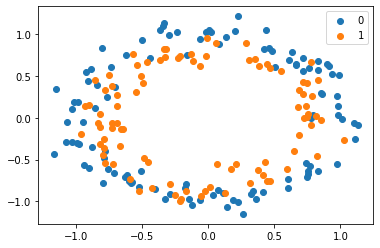

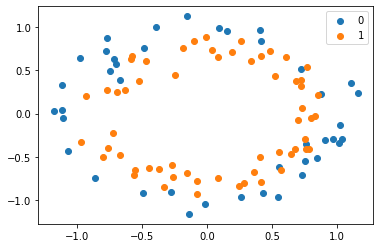

In [ ]:
plotDataset(trX, trY)
plotDataset(teX, teY)

0.6060606060606061


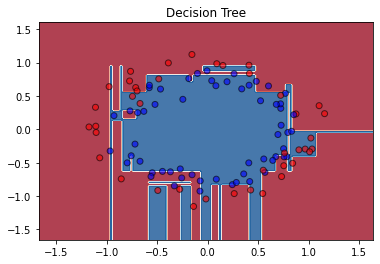

In [ ]:
estimator = DecisionTreeClassifier(random_state=rs)
estimator.fit(trX, trY)
predY = estimator.predict(teX)
dtAccuracy = accuracy_score(teY, predY)
print(dtAccuracy)
plotEstimator(trX, trY, teX, teY, estimator, 'Decision Tree')

# ***AdaBoost***

In [ ]:


def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  #plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

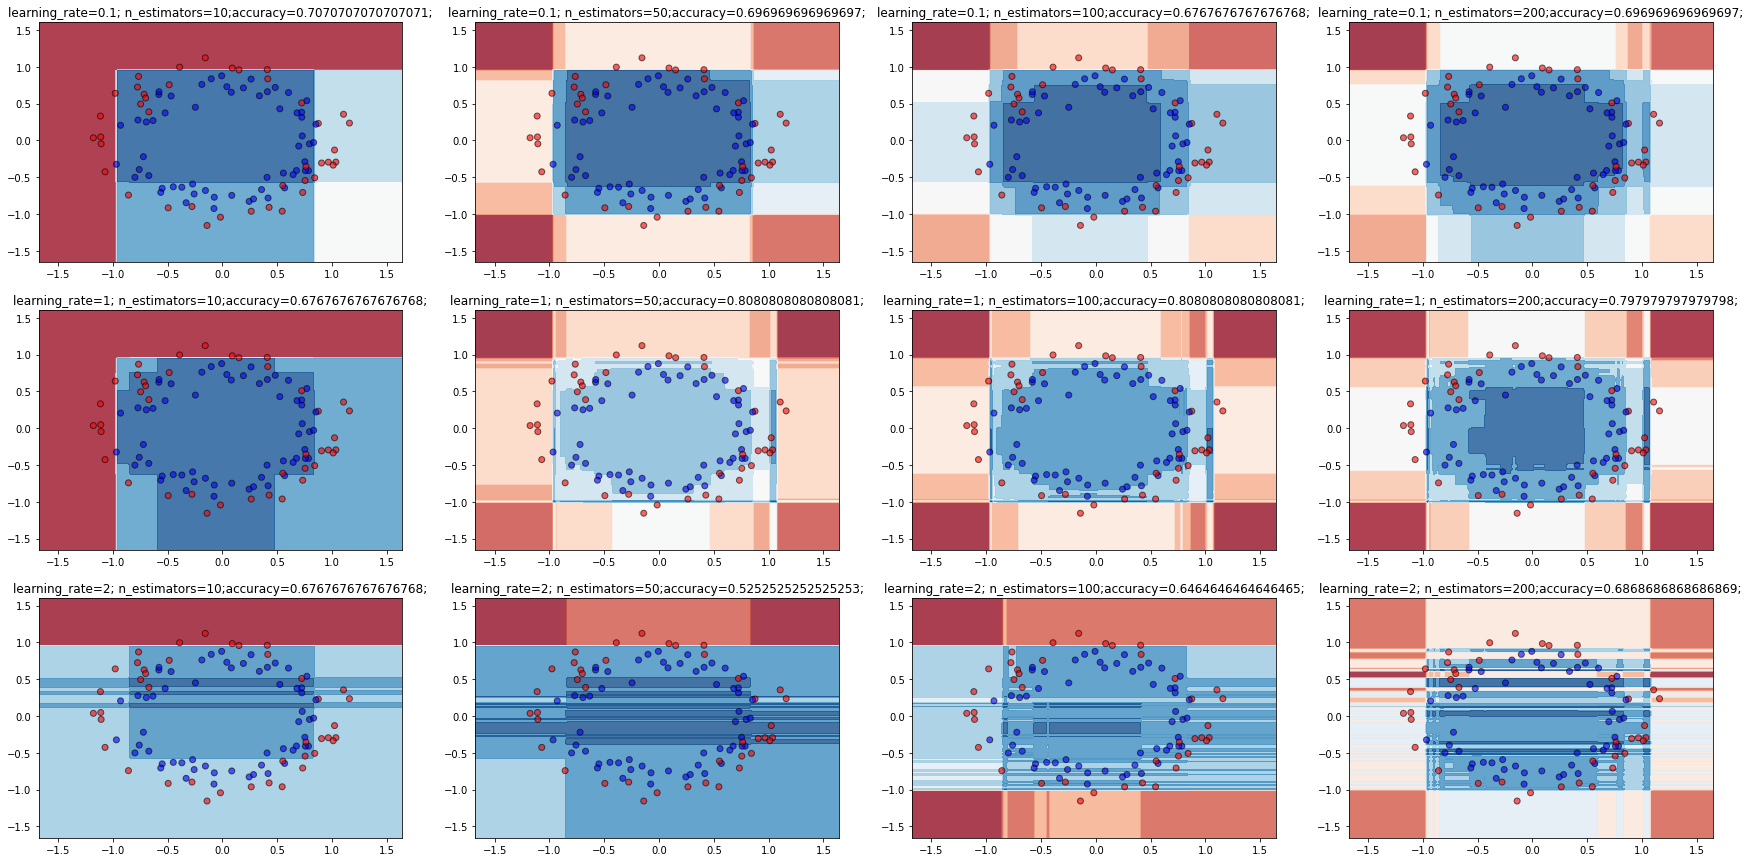

In [ ]:
from sklearn.model_selection import ParameterGrid
plt.figure(figsize=(30,15))
par={
    'n_estimators':[10, 50, 100, 200],
     'learning_rate': [0.1, 1, 2],
}
estimator = AdaBoostClassifier( random_state=rs) #estimator>> classifier in decision trees
parameters=ParameterGrid(par)
for i,par in enumerate(parameters):
  plt.subplot(3,4,i+1)
  est=clone(estimator)
  Mest=est.set_params(**par)
  est.fit(trX, trY)
  predY=est.predict(teX)
  score=accuracy_score(teY,predY)
  paramStr = '; '.join([f'{k}={v}' for k, v in par.items()])
  plotEstimator(trX, trY, teX, teY, Mest)
  plt.title(f'{paramStr};accuracy={score};')
 
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


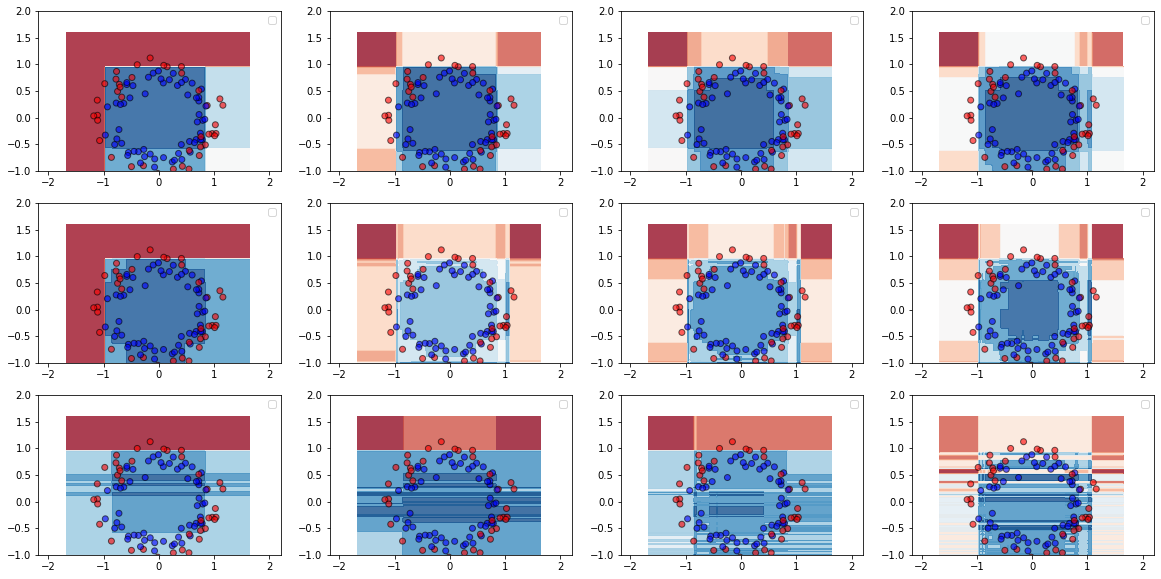

In [ ]:
from sklearn.model_selection import ParameterGrid
hyperParams = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate' : [0.1, 1, 2],
    
}
paramGrid = ParameterGrid(hyperParams)

estimator = AdaBoostClassifier(random_state=rs) #estimator>> classifier in decision trees
plt.figure(figsize=(20,10))

for index, param in enumerate(paramGrid):
    plt.subplot(3, 4, index + 1)
    tmpEst = clone(estimator)
    tmpEst.set_params(**param)
    tmpEst.fit(trX, trY)
    predY = tmpEst.predict(teX)
    paramStr = '; '.join([f'{k}={v}' for k, v in param.items()])
    score = estimator.fit(trX, trY).score(teX, teY)
    plt.title(f'{paramStr} ,"Acc":{score}')
    plotEstimator(trX, trY, teX, teY, tmpEst.set_params(**param))
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    # plt.savefig(f'Results/{paramStr}.png')
    # plt.show()
  

plt.show()

# **Bagging**

**def function**

In [ ]:

def plotDataset(X, y,tilte):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  plt.legend()
  plt.title(tilte)
  plt.show()


def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  # estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  # Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  v, Z = predict_bagging(estimator, np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

BootSrap **Dataset**

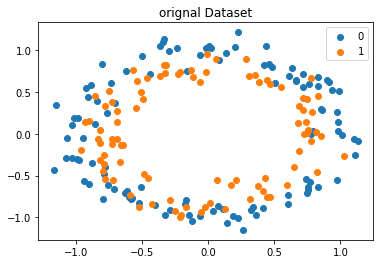

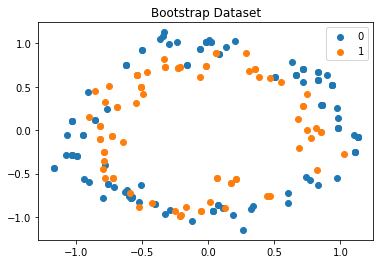

In [ ]:
from sklearn.utils import resample

list_of_models = []
bs =[]
bsX, bsY = resample(trX, trY, random_state=rs)

plotDataset(trX, trY,"orignal Dataset")
plotDataset(bsX, bsY,"Bootstrap Dataset")


### **Bagging Manual**

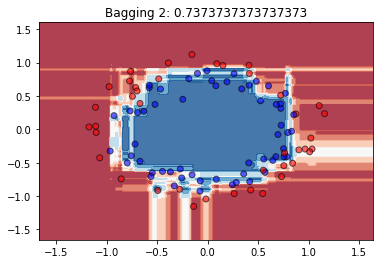

[1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1]


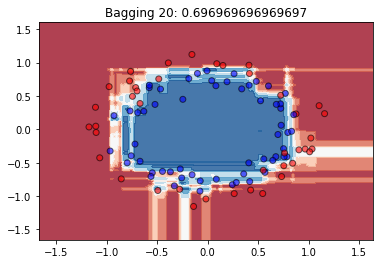

[1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1]


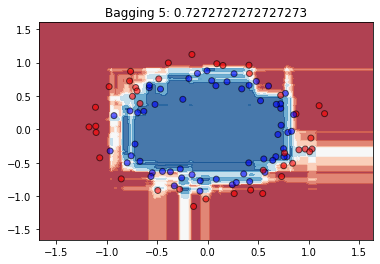

[1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1]


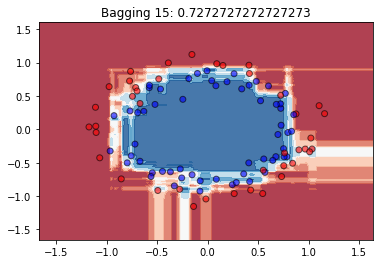

[1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

def fit_bagging(num_of_estimators, trX, trY):
  for i in range(num_of_estimators):
    bsX , bsY = resample(trX, trY)
    model = DecisionTreeClassifier()
    model.fit(bsX,bsY)
    list_of_models.append(model)
    #bs.append(bsY)
  return list_of_models

def predict_bagging(list_of_models, data):
  list_of_preds = []
  list_of_final_preds = []
  list_of_final_preds_unrounded = []
  for m in list_of_models:
    preds = m.predict(data)
    list_of_preds.append(preds)
  for i in range(len(data)):
    #pred = (list_of_preds[0][i] + list_of_preds[1][i])/2

    pred=0
    for p in list_of_preds:
      pred = pred + p[i]
    pred = pred/len(list_of_models)
    list_of_final_preds_unrounded.append(pred)
    pred = round(pred)
    list_of_final_preds.append(pred)
  return np.array(list_of_final_preds), np.array(list_of_final_preds_unrounded)


#print(list_of_models)
 
models = fit_bagging(4,trX, trY)
preds = predict_bagging(models, teX)
#print(preds)

# predict_bagging(list_of_models)

estem = {2, 5, 15, 20}
for nEst in estem:
  models = fit_bagging(8,trX, trY)
  preds, preds_proba = predict_bagging(models, teX)
  score = accuracy_score(teY, preds)
  plotEstimator(trX, trY, teX, teY, models, f'Bagging {nEst}: {score}')
  print(preds)
